[Table of Contents](./table_of_contents.ipynb)

# The g-h Filter

In [1]:
#!python3 -m pip install filter
#import kf_book.book_plots as book_plots

In [2]:
%matplotlib inline

In [3]:
#format the book
import book_format
book_format.set_style()

Please install FilterPy from the command line by running the command
	$ pip install filterpy

See chapter 0 for instructions.
Please install SymPy before continuing. See chapter 0 for instructions.


UnboundLocalError: local variable 'filterpy' referenced before assignment

Before we start, be sure you understand how to use [Jupyter Notebooks](http://jupyter.org/), and are familiar with the [SciPy](https://scipy.org), [NumPy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/) packages, as they are used throughout this book. The Preface contains an introduction to these packages.

## Building Intuition via Thought Experiments  通过思想实验建立直觉

Imagine that we live in a world without scales - the devices you stand on to weigh yourself. One day at work a co-worker comes running up to you and announces her invention of a 'scale' to you. After she explains, you eagerly stand on it and announce the results: "172 lbs". You are ecstatic - for the first time in your life you know what you weigh. More importantly, dollar signs dance in your eyes as you imagine selling this device to weight loss clinics across the world! This is fantastic! 
想象一下，我们生活在一个没有磅秤的世界中-您所站立的设备可以称重自己。在工作的一天，一位同事向您冲来，向您宣布她发明了一种“秤”。在她解释完之后，您热切地站在上面并宣布结果：“ 172磅”。您欣喜若狂-这是您人生中第一次知道自己的体重。更重要的是，您可以想象向世界各地的减肥诊所出售该设备时，美元符号在您的眼中跳动！这是太棒了！ 

Another co-worker hears the commotion and comes over to find out what has you so excited. You explain the invention and once again step onto the scale, and proudly proclaim the result: "161 lbs." And then you hesitate, confused.  
另一位同事听到了骚动，走了过去，找出了令您兴奋的地方。您对发明进行了解释，然后再次涉足磅秤，并自豪地宣布结果：“ 161磅”。然后你犹豫，困惑

"It read 172 lbs a few seconds ago", you complain to your co-worker. 
“它在几秒钟前读数为172磅”，您向同事抱怨。

"I never said it was accurate," she replies.
她回答说：“我从未说过这是准确的。”

Sensors are inaccurate. This is the motivation behind a huge body of work in filtering, and solving this problem is the topic of this book. I could just provide the solutions that have been developed over the last half century, but these solutions were developed by asking very basic, fundamental questions into the nature of what we know and how we know it. Before we attempt the math, let's follow that journey of discovery, and see if it informs our intuition about filtering.  
传感器不正确。这是进行大量过滤工作的动机，而解决这一问题是本书的主题。我只能提供过去半个世纪开发的解决方案，但是这些解决方案是通过向我们所知道的和我们所知道的本质询问非常基本的基本问题而开发的。在尝试数学之前，让我们跟随发现的过程，看看它是否有助于我们对过滤的直觉。

**Try Another Scale  尝试另一种规模**

Is there any way we can improve upon this result? The obvious, first thing to try is get a better sensor. Unfortunately, your co-worker informs you that she has built 10 scales, and they all operate with about the same accuracy. You have her bring out another scale, and you weigh yourself on one, and then on the other. The first scale (A) reads "160 lbs", and the second (B) reads "170 lbs". What can we conclude about your weight?  
有什么办法可以改善这个结果？显而易见，首先要尝试的是获得更好的传感器。不幸的是，您的同事告诉您，她已经制造了10台秤，并且它们的操作精度都差不多。您让她拿出另一只秤，然后在另一只秤上称自己体重。第一个刻度（A）的读数为“ 160磅”，第二个刻度（B）的读数为“ 170磅”。关于您的体重，我们可以得出什么结论？

Well, what are our choices?  
好吧，我们有什么选择？

* We could choose to only believe A, and assign 160lbs to our weight estimate.
* We could choose to only believe B, and assign 170lbs to our weight.
* We could choose a number less than both A and B.
* We could choose a number greater than both A and B.
* We could choose a number between A and B.
* 我们可以选择只相信A，然后将160磅分配给我们的体重估算。  
* 我们可以选择只相信B，并为我们的体重分配170磅。   
* 我们可以选择小于A和B的数字。   
* 我们可以选择一个大于A和B的数字。   
* 我们可以在A和B之间选择一个数字。

The first two choices are plausible, but we have no reason to favor one scale over the other. Why would we choose to believe A instead of B? We have no reason for such a belief. The third and fourth choices are irrational. The scales are admittedly not very accurate, but there is no reason at all to choose a number outside of the range of what they both measured. The final choice is the only reasonable one. If both scales are inaccurate, and as likely to give a result above my actual weight as below it, more often than not the answer is somewhere between A and B.   
前两个选择是合理的，但我们没有理由偏向于一个规模。为什么我们选择相信A而不是B？我们没有理由相信这一点。第三和第四选择是不合理的。比例尺虽然不是很准确，但是根本没有理由选择超出两者均测量范围的数字。最后的选择是唯一合理的选择。如果两个刻度都不正确，并且结果可能超过我的实际体重，也可能低于我的实际体重，那么答案通常是在A和B之间。

In mathematics this concept is formalized as [*expected value*](https://en.wikipedia.org/wiki/Expected_value), and we will cover it in depth later. For now ask yourself what would be the 'usual' thing to happen if we took one million readings. Some of the times both scales will read too low, sometimes both will read too high, and the rest of the time they will straddle the actual weight. If they straddle the actual weight then certainly we should choose a number between A and B. If they don't straddle then we don't know if they are both too high or low, but by choosing a number between A and B we at least mitigate the effect of the worst measurement. For example, suppose our actual weight is 180 lbs. 160 lbs is a big error. But if we choose a weight between 160 lbs and 170 lbs our estimate will be better than 160 lbs. The same argument holds if both scales returned a value greater than the actual weight.  
在数学中，这个概念被形式化为期望值，稍后我们将对其进行深入介绍。现在，问问自己，如果我们读取一百万个读数，将会发生什么“平常”的事情。在某些情况下，两个秤的读数都可能太低，有时两个秤的读数都太高，其余时间它们会跨越实际重量。如果它们跨过实际重量，那么我们当然应该在A和B之间选择一个数字。如果它们跨度不大，那么我们就不知道它们是否太高或太低，但是通过在A和B之间选择一个数字，我们可以至少减轻最差测量的影响。例如，假设我们的实际体重为180磅。 160磅是一个大错误。但是，如果我们在160磅和170磅之间选择一个重量，我们的估计将比160磅更好。如果两个秤的返回值均大于实际重量，则使用相同的参数。

We will deal with this more formally later, but for now I hope it is clear that our best estimate is the average of A and B.   
我们稍后将更正式地处理此问题，但是现在我希望很明显，我们的最佳估计是A和B的平均值。

$$\frac{160+170}{2} = 165$$

We can look at this graphically. I have plotted the measurements of A and B with an assumed error of $\pm$ 8 lbs. The measurements falls between 160 and 170 so the only weight that makes sense must lie within 160 and 170 lbs.   
我们可以以图形的方式查看它。我绘制了A和B的测量值，假定误差为±±8磅。尺寸介于160到170磅之间，因此唯一有意义的重量必须在160磅和170磅之间。

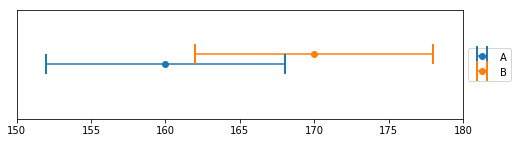

In [4]:
import kf_book.book_plots as book_plots
from kf_book.book_plots import plot_errorbars
plot_errorbars([(160, 8, 'A'), (170, 8, 'B')], xlims=(150, 180))

In [5]:
plot_errorbars?


A word on how I generated this plot. I import code from the module book_plots in the `kf_book` subdirectory. Generating this plot takes a lot of boilerplate Python that isn't interesting to read. I take this tack often in the book. When the cell is run `plot_errorbars()` gets called and the plot is inserted into the book.  
关于我如何生成此情节的一句话。我从kf_book子目录中的book_plots模块导入代码。生成该图需要花费很多样板Python，这些Python并不是很有趣。我在书中经常这样说。当单元运行时，`plot_errorbars（）`被调用，并且绘图被插入到书中。

If this is your first time using [Jupyter Notebook](http://jupyter.org/), the code above is in a *cell*. The text "In [2]:" labels this as a cell where you can enter input, and the number in the bracket denotes that this cell was run second. To run the cell, click on it with your mouse so that it has focus, then press CTRL+ENTER on the keyboard. As we continue you will be able to alter the code inside the cells and rerun them. Try changing the values "160", "170", and "8" to some other value and run the cell. The printed output should change depending on what you entered.  
如果这是您第一次使用Jupyter Notebook，则上面的代码在单元格中。文本“在[2]中：”将其标记为可在其中输入输入的单元格，括号中的数字表示此单元格第二次运行。要运行该单元格，请用鼠标单击它，使其具有焦点，然后按键盘上的CTRL + ENTER。随着我们的继续，您将能够更改单元格中的代码并重新运行它们。尝试将值“ 160”，“ 170”和“ 8”更改为其他值，然后运行单元格。打印的输出应根据您输入的内容而变化。

If you want to view the code for plot_errorbars, either open it in an editor, or create a new cell and type the function name followed by two question marks. Press Ctrl+Enter, and your browser will open a window displaying the source code. This is a feature of Jupyter Notebooks. If you want to just view the documentation for the function, do the same but with one question mark.  
如果要查看plot_errorbars的代码，请在编辑器中将其打开，或创建一个新单元格并键入函数名称，后跟两个问号。按Ctrl + Enter，浏览器将打开一个显示源代码的窗口。这是Jupyter Notebook的功能。如果您只想查看该功能的文档，请执行相同的操作，但带有一个问号。

```Python

    plot_errorbars??
```
or
```Python
    plot_errorbars?
```

So 165 lbs looks like a reasonable estimate, but there is more information here that we might be able to take advantage of. The only weights that are possible lie in the intersection between the error bars of A and B. For example, a weight of 161 lbs is impossible because scale B could not give a reading of 170 lbs with a maximum error of 8 pounds. Likewise a weight of 169 lbs is impossible because scale A could not give a reading of 160 lbs with a maximum error of 8 lbs. In this example the only possible weights lie in the range of 162 to 168 lbs.  
因此165磅似乎是一个合理的估计，但是这里有更多信息可以利用。唯一可能的砝码位于A和B的误差线之间的交点处。例如，161 lbs的重量是不可能的，因为秤B不能给出170 lbs的读数，最大误差为8磅。同样，重量169磅是不可能的，因为秤A不能给出160磅的读数，最大误差为8磅。在此示例中，唯一可能的重量在162到168磅的范围内。

That doesn't yet allow us to find a better weight estimate, but let's play 'what if' some more. What if we are now told that A is three times more accurate than B? Consider the 5 options we listed above. It still makes no sense to choose a number outside the range of A and B, so we will not consider those. It perhaps seems more compelling to choose A as our estimate - after all, we know it is more accurate, why not use it instead of B? Can B possibly improve our knowledge over A alone?  
那还不能让我们找到更好的体重估计值，但让我们再来看看“假设”。如果现在我们被告知A的准确度是B的三倍，该怎么办？考虑我们上面列出的5个选项。选择A和B范围以外的数字仍然没有意义，因此我们将不考虑这些数字。选择A作为我们的估计似乎更有吸引力-毕竟，我们知道它更准确，为什么不使用它代替B？ B可能比A单独提高我们的知识吗？


The answer, perhaps counter intuitively, is yes, it can. First, let's look at the same measurements of A=160 and B=170, but with the error of A $\pm$ 3 lbs and the error of B is 3 times as much, $\pm$ 9 lbs.  
答案也许是直觉上的反驳，是的，可以。首先，让我们看一下A = 160和B = 170的相同测量值，但是误差为A±3磅，而B的误差为3倍，即±9磅。

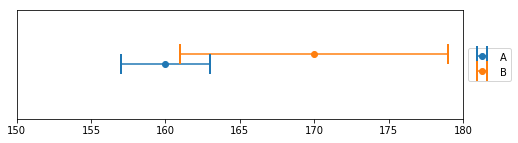

In [6]:
plot_errorbars([(160, 3, 'A'), (170, 9, 'B')], xlims=(150, 180))

The overlap of the error bars of A and B are the only possible true weight. This overlap is smaller than the error in A alone. More importantly, in this case we can see that the overlap doesn't include 160 lbs or 165 lbs. If we only used the measurement from A because it is more accurate than B we would give an estimate of 160 lbs. If we average A and B we would get 165 lbs. Neither of those weights are possible given our knowledge of the accuracy of the scales. By including the measurement of B we would give an estimate somewhere between 161 lbs and 163 lbs, the limits of the intersections of the two error bars.  
A和B的误差线的重叠是唯一可能的真实权重。该重叠小于单独的A中的误差。更重要的是，在这种情况下，我们可以看到重叠不包括160磅或165磅。如果我们仅使用A的测量值，因为它比B更准确，那么我们将得出160磅的估计值。如果我们平均A和B，我们将得到165磅。鉴于我们对秤的准确性的了解，这两个权重都不可能实现。通过包括B的测量值，我们可以得出两个误差线的交点极限在161 lbs和163 lbs之间的某个估计值。


Let's take this to the extreme limits.  Assume we know scale A is accurate to 1 lb. In other words, if we truly weigh 170 lbs, it could report 169, 170, or 171 lbs. We also know that scale B is accurate to 9 lbs. We do a weighing on each scale, and get A=160, and B=170. What should we estimate our weight to be? Let's look at that graphically.  
让我们将其发挥到极致。假设我们知道秤A精确到1磅。换句话说，如果我们真正称重170磅，则它可能报告169、170或171磅。我们也知道，秤B的精确度为9磅。我们对每个秤进行称重，得出A = 160，B = 170。我们应该估计体重是多少？让我们以图形的方式来看一下。

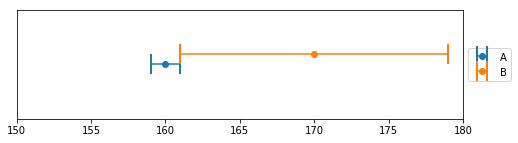

In [7]:
plot_errorbars([(160, 1, 'A'), (170, 9, 'B')], xlims=(150, 180))

Here we can see that the only possible weight is 161 lbs. This is an important result. With two relatively inaccurate sensors we are able to deduce an extremely accurate result.  
在这里我们可以看到唯一可能的重量是161磅。这是一个重要的结果。使用两个相对不准确的传感器，我们可以得出极其准确的结果。

**So two sensors, even if one is less accurate than the other, is better than one.** I will harp on this for the remainder of the book. We never throw information away, no matter how poor it is. We will be developing math and algorithms that allow us to include all possible sources of information to form the best estimate possible.  
**因此，即使一个传感器的精度不如另一个，两个传感器也要比一个更好。** 我将在本书的其余部分中对此进行竖琴式的练习。无论信息多么糟糕，我们都不会丢弃信息。我们将开发数学和算法，使我们能够包括所有可能的信息源，以形成可能的最佳估计。

However, we have strayed from our problem. No customer is going to want to buy multiple scales, and besides, we initially started with an assumption that all scales were equally (in)accurate. This insight of using all measurements regardless of accuracy will play a large role later, so don't forget it.  
但是，我们偏离了我们的问题。没有客户会想要购买多个秤，此外，我们最初以所有秤均准确无误为前提。不管精度如何，使用所有测量的见解将在以后发挥重要作用，因此请不要忘记它。

What if I have one scale, but I weigh myself many times? We concluded that if we had two scales of equal accuracy we should average the results of their measurements. What if I weigh myself 10,000 times with one scale? We have already stated that the scale is equally likely to return a number too large as it is to return one that is too small. It is not that hard to prove that the average of a large number of weights will be very close to the actual weight, but let's write a simulation for now. I will use NumPy, part of the [SciPy](https://scipy.org/) ecosystem for numerical computation.  
如果我只有一个体重秤，但又多次称重自己该怎么办？我们得出的结论是，如果我们有两个精度相等的量表，则应平均其测量结果。如果我用一个秤称量自己10,000次该怎么办？我们已经说过，小数位数返回的数字和返回的数字一样小。不难证明大量权重的平均值将非常接近实际权重，但现在让我们编写一个模拟。我将使用[SciPy]（https://scipy.org/）生态系统的一部分NumPy进行数值计算。

[160.8514097  161.27106217 163.38176852 ... 161.47806387 168.36765623
 167.00821817]


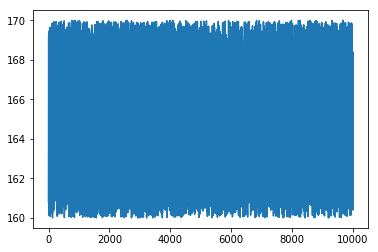

Average of measurements is 164.9782


In [8]:
import numpy as np
import matplotlib.pyplot as plot
# 从均匀分布中抽取样本
measurements = np.random.uniform(160, 170, size=10000)
print(measurements)
mean = measurements.mean()
plot.plot(measurements)
plot.show()
print(f'Average of measurements is {mean:.4f}')

In [9]:
#np.random.uniform?

The exact number printed depends on your random number generator, but it should be very close to 165.  
打印的确切数字取决于您的随机数生成器，但是它应该非常接近165。

This code makes one assumption that probably isn't true - that the scale is as likely to read 160 as 165 for a true weight of 165 lbs. This is almost never true. Real sensors are more likely to get readings nearer the true value, and are less and less likely to get readings the further away from the true value it gets. We will cover this in detail in the Gaussian chapter. For now, I will use without further explanation the `numpy.random.normal()` function, which will produce more values nearer 165 lbs, and fewer further away. Take it on faith for now that this will produce noisy measurements similar to how a real scale works.  
这段代码做出了一个假设，即可能不正确-对于165磅的真实重量，秤的读数可能与165的读数一样，为165。这几乎从来都不是真的。真实的传感器更有可能获得接近真实值的读数，而获得其远离真实值的读数的可能性越来越小。我们将在高斯章中对此进行详细介绍。现在，我将不加说明地使用numpy.random.normal（）函数，该函数将在165 lbs附近产生更多值，而在165 lbs附近产生更少的值。现在就相信它会产生类似于真实比例的噪声测量。

Average of measurements is 164.9891


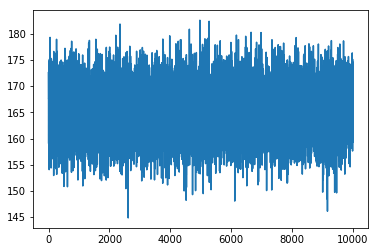

In [10]:
mean = np.random.normal(165, 5, size=10000).mean()
print(f'Average of measurements is {mean:.4f}')
plot.plot(np.random.normal(165, 5, size=10000))
plot.show()

Again the answer is very close to 165.   
同样，答案非常接近165。

Okay, great, we have an answer to our sensor problem! But it is not a very practical answer. No one has the patience to weigh themselves ten thousand, or even a dozen times.   
好的，太好了，我们已经解决了传感器问题！但这不是一个很实际的答案。没有人有耐心来称量自己一万次，甚至十几次。

So, let's play 'what if'. What if you measured your weight once a day, and got the readings 170, 161, and then 169. Did you gain weight, lose weight, or is this all just noisy measurements?   
所以，让我们玩“如果”。如果您每天测量一次体重，并且读数分别为170、161和169，该怎么办？您体重增加了吗？减肥了吗？或者这仅仅是嘈杂的测量值吗？

We really can't say. The first measurement was 170, and the last was 169, implying a 1 lb loss. But if the scale is only accurate to 10 lbs, that is explainable by noise. I could have actually gained weight; maybe my weight on day one was 165 lbs, and on day three it was 172. It is possible to get those weight readings with that weight gain. My scale tells me I am losing weight, and I am actually gaining weight! Let's look at that in a chart. I've plotted the measurements along with the error bars, and then some possible weight gain/losses that could be explained by those measurements in dotted green lines.  
我们真的不能说。第一次测量为170，最后一次测量为169，这意味着损失了1磅。但是，如果秤仅精确到10磅，则可以用噪音来解释。我本来可以变胖的。也许我第一天的体重是165磅，而第三天的体重是172磅。随着体重的增加，有可能获得那些体重读数。我的体重秤告诉我我正在减肥，而实际上我正在增加体重！让我们在图表中看一下。我绘制了测量值以及误差线，然后绘制了一些可能的体重增加/损失，这些损失可以用绿点虚线表示。

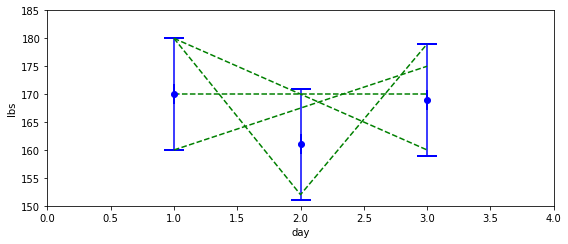

In [11]:
import kf_book.gh_internal as gh
gh.plot_hypothesis1()

As we can see there is an extreme range of weight changes that could be explained by these three measurements. In fact, there are an infinite number of choices. Shall we give up? Not me! Recall that we are talking about measuring a human's weight. There is no reasonable way for a human to weigh 180 lbs on day 1 and 160 lbs on day 3. or to lose 30 lbs in one day only to gain it back the next (we will assume no amputations or other trauma has happened to the person).   
我们可以看到，这三种测量值可以解释重量变化的极端范围。实际上，有无数的选择。我们要放弃吗？不是我！回想一下，我们正在谈论测量人的体重。人类没有合理的方法在第1天重180磅，在第3天重160磅，或者一天失去30磅而只能在第二天恢复体重（我们将假设没有截肢或其他外伤发生）。人）。

The behavior of the physical system we are measuring should influence how we interpret the measurements. If we were weighing a rock each day we'd attribute all of the variance to noise. If we were weighing a cistern fed by rain and used for household chores we might believe such weight changes are real.  
我们正在测量的物理系统的行为应该影响我们解释测量的方式。如果我们每天都在称重一块岩石，我们会将所有差异归因于噪音。如果我们称重一个被雨水喂养的水箱并用于家务，我们可能会认为这种体重变化是真实的。
 
Suppose I take a different scale, and I get the following measurements: 169, 170, 169, 171, 170, 171, 169, 170, 169, 170. What does your intuition tell you? It is possible, for example, that you gained 1 lb each day, and the noisy measurements just happens to look like you stayed the same weight. Equally, you could have lost 1 lb a day and gotten the same readings. But is that likely? How likely is it to flip a coin and get 10 heads in a row? Not very likely. We can't prove it based solely on these readings, but it seems pretty likely that my weight held steady. In the chart below I've plotted the measurements with error bars, and a likely true weight in dashed green. This dashed line is not meant to be the 'correct' answer to this problem, merely one that is reasonable and could be explained by the measurement.  
假设我采用不同的比例，并且得到以下度量：169、170、169、171、170、171、169、170、169、170。您的直觉告诉您什么？例如，您可能每天增加1磅，而嘈杂的测量恰好看起来就像您保持相同的体重。同样，您每天可能丢失1磅并获得相同的读数。但这可能吗？抛硬币并连续获得10个头的可能性有多大？不太可能。我们不能仅根据这些读数来证明这一点，但是我的体重似乎很可能保持稳定。在下面的图表中，我用误差线绘制了测量值，并用虚线绿色绘制了可能的真实重量。这条虚线并不是对这个问题的“正确”答案，只是一个合理的并且可以通过测量来解释的问题。

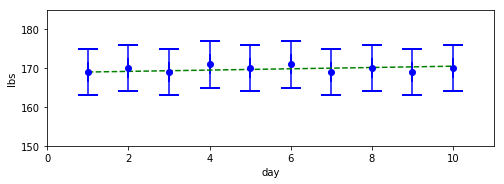

In [58]:
gh.plot_hypothesis2()

Another what if: what if the readings were 158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0? Let's look at a chart of that and then answer some questions.  
另一个假设是：如果读数分别为158.0、164.2、160.3、159.9、162.1、164.6、169.6、167.4、166.4、171.0，该怎么办？让我们看一下它的图表，然后回答一些问题。

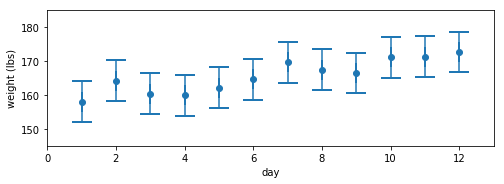

In [12]:
gh.plot_hypothesis3()

Does it 'seem' likely that I lost weight and this is just really noisy data? Not really. Does it seem likely that I held the same weight? Again, no. This data trends upwards over time; not evenly, but definitely upwards. We can't be sure, but that looks like a weight gain, and a significant weight gain at that. Let's test this assumption with some more plots. It is often easier to 'eyeball' data in a chart versus a table.  
我是否似乎“减肥”了，而这确实是嘈杂的数据？并不是的。我似乎保持同样的体重吗？再说一次这些数据会随着时间而上升；不均匀，但肯定向上。我们不能确定，但这看起来像是体重增加，并且体重显着增加。让我们用更多的图来测试这个假设。与图表相比，“比较”图表中的数据通常更容易。

So let's look at two hypotheses. First, let's assume our weight did not change. To get that number we agreed that we should average the measurements. Let's look at that.  
因此，让我们看两个假设。首先，假设我们的体重没有变化。为了获得该数字，我们同意对测量值求平均。让我们看看。


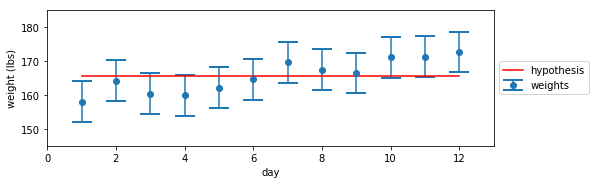

In [13]:
gh.plot_hypothesis4()

That doesn't look very convincing. In fact, we can see that there is no horizontal line that we could draw that is inside all of the error bars.  
这看起来并不令人信服。实际上，我们可以看到在所有误差栏中都没有可绘制的水平线。

Now, let's assume we gained weight. How much? I don't know, but NumPy does! We want to draw a line through the measurements that looks 'about' right. NumPy has functions that will do this according to a rule called "least squares fit". Let's not worry about the details of that computation (I use [polyfit()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) if you are interested), and just plot the results.  
现在，假设我们体重增加了。多少？我不知道，但是NumPy知道！我们想通过看起来“大约”正确的测量画一条线。 NumPy具有根据称为“最小二乘拟合”的规则执行此操作的函数。让我们不必担心该计算的细节（如果您感兴趣的话，我会使用polyfit（）），而只需绘制结果即可。

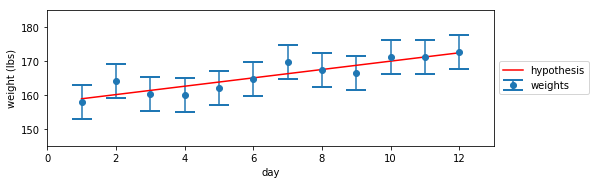

In [14]:
gh.plot_hypothesis5()

This looks much better, at least to my eyes. Notice now the hypothesis lies very close to each measurement, whereas in the previous plot the hypothesis was often quite far from the measurement. It seems far more likely to be true that I gained weight than I didn't gain any weight. Did I actually gain 13 lbs? Who can say? That seems impossible to answer.
至少在我看来，这看起来好多了。现在注意假设与每个度量非常接近，而在前一个图中，假设通常离度量很远。与没有增加体重相比，增加体重似乎更有可能是事实。我实际上增加了13磅吗？谁能说？这似乎无法回答。

"But is it impossible?" pipes up a co-worker.  
“但是不可能吗？”安排同事。

Let's try something crazy. Let's assume that I know I am gaining about one lb a day. It doesn't matter how I know that right now, assume I know it is approximately correct. Maybe I am on a 6000 calorie a day diet, which would result in such a weight gain. Or maybe there is another way to estimate the weight gain. This is a thought experiment, the details are not important. Let's see if we can make use of such information if it was available.  
让我们尝试一些疯狂的事情。假设我知道我一天要增加一磅。假设我知道它是正确的，那么我现在怎么知道都没关系。也许我每天要摄入6000卡的热量，这会导致体重增加。也许还有另一种方法来估算体重增加。这是一个思想实验，细节并不重要。让我们看看是否可以利用这些信息（如果可用）。

The first measurement was 158. We have no way of knowing any different, so let's accept that as our estimate. If our weight today is 158, what will it be tomorrow? Well, we think we are gaining weight at 1 lb/day, so our prediction is 159, like so:  
第一次测量是158。我们无法知道任何不同之处，因此让我们接受它作为我们的估计。如果我们今天的体重是158，明天会是什么？好吧，我们认为我们的体重每天增加1磅，因此我们的预测是159，如下所示：

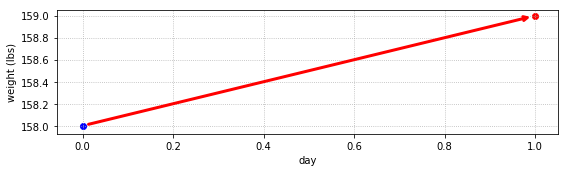

In [15]:
gh.plot_estimate_chart_1()

Okay, but what good is this? Sure, we could assume the 1 lb/day is accurate, and predict our weight for the next 10 days, but then why use a scale at all if we don't incorporate its readings? So let's look at the next measurement. We step on the scale again and it displays 164.2 lbs.  
好的，这有什么好处？当然，我们可以假设1磅/天是准确的，并且可以预测接下来10天的体重，但是如果我们不使用磅秤，那么为什么还要使用磅秤呢？因此，让我们看一下下一个度量。我们再次踩秤，它显示164.2磅。

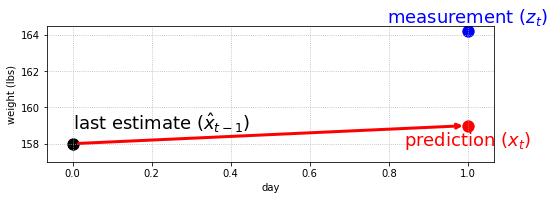

In [59]:
gh.plot_estimate_chart_2()

We have a problem. Our prediction doesn't match our measurement. But, that is what we expected, right? If the prediction was always exactly the same as the measurement, it would not be capable of adding any information to the filter. And, of course, there would be no reason to ever measure since our predictions are perfect.  
我们出现了问题。我们的预测与我们的测量结果不符。但是，这就是我们所期望的，对吗？如果预测始终与测量完全相同，则它将无法向过滤器添加任何信息。当然，由于我们的预测是完美的，因此没有理由进行测量。

> **The key insight to this entire book is in the next paragraph. Read it carefully! 下一节是整本书的主要见解。请仔细阅读！**

So what do we do? If we only form estimates from the measurement then the prediction will not affect the result. If we only form estimates from the prediction then the measurement will be ignored. If this is to work we need to take some kind of **blend of the prediction and measurement** (I've bolded the key point).  
那么我们该怎么办？如果我们仅从测量中得出估计值，那么预测将不会影响结果。如果我们仅根据预测形成估计，则将忽略该测量。如果这行得通，我们需要采取某种“预测和测量混合”的方式（我已将重点加粗了）。

Blending two values - this sounds a lot like the two scale problem earlier. Using the same reasoning as before we can see that the only thing that makes sense is to choose a number between the prediction and the measurement. For example, an estimate of 165 makes no sense, nor does 157. Our estimates should lie between 159 (the prediction) and 164.2 (the measurement).  
混合两个值-听起来很像前面的两个比例尺问题。使用与以前相同的推理，我们可以看到，唯一有意义的是在预测和测量之间选择一个数字。例如，估计165毫无意义，也没有157。我们的估计应介于159（预测）和164.2（度量）之间

One more time, this is so important. We agreed that when presented two values with errors, we should form an estimate part way between the two values. It does not matter how those values were generated. In the start of the chapter we had two measurements, but now we have one measurement and one prediction. The reasoning, and hence the math is the same in both cases. We *never* throw information away. I mean it. I see so much commercial software that throws away noisy data. Don't do it! Our prediction of a weight gain might not be very accurate, but so long as there is some information we should use it.
再过一次，这是如此重要。我们同意，当为两个值提供错误时，我们应该在两个值之间形成估计。这些值是如何生成的并不重要。在本章的开头，我们进行了两次测量，但是现在我们进行了一次测量和一项预测。在两种情况下，推理和数学都相同。我们*永不*丢弃信息。我是认真的。我看到太多的商业软件会丢弃嘈杂的数据。别做！我们对体重增加的预测可能不是很准确，但是只要有一些信息，我们就应该使用它。

I have to insist you stop and really think about this. All I have done is replaced an inaccurate scale with an inaccurate weight prediction based on human physiology. It is still data. Math doesn't know if the data came from a scale or a prediction. We have two pieces of data with a certain amount of noise, and we want to combine them. In the remainder of this book we are going to develop some fairly complicated math to perform this computation, but the math never cares where the data come from, it only makes computations based on the value and accuracy of those values.   
我必须坚持让您停下来，并认真考虑一下。我所做的只是用基于人体生理的不正确体重预测代替了不准确的体重秤。它仍然是数据。数学不知道数据是来自刻度还是预测。我们有两个带有一定噪声的数据，我们希望将它们合并。在本书的其余部分中，我们将开发一些相当复杂的数学来执行此计算，但是该数学从不在乎数据的来源，它仅基于这些值的值和准确性进行计算。

Should the estimate be half way between the measurement and prediction? Maybe, but in general it seems like we might know that our prediction is more or less accurate compared to the measurements. Probably the accuracy of our prediction differs from the accuracy of the scale. Recall what we did when scale A was much more accurate than scale B - we scaled the answer to be closer to A than B. Let's look at that in a chart.  
估算值是否应该介于测量和预测之间？也许可以，但是总的来说，似乎我们可能知道我们的预测与测量结果相比或多或少是准确的。我们的预测准确性可能与量表的准确性有所不同。回想一下，当A量表比B量表更准确时我们做了什么-我们将答案的比例缩放为更接近A而不是B。让我们在图表中看一下。

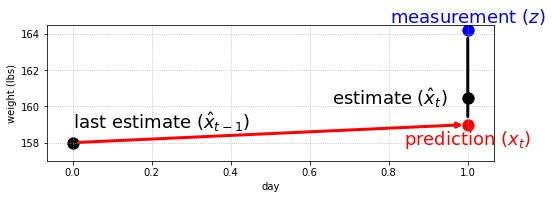

In [17]:
gh.plot_estimate_chart_3()

Now let's try a randomly chosen number to scale our estimate: $\frac{4}{10}$. Our estimate will be four tenths the measurement and the rest will be from the prediction. In other words, we are expressing a belief here, a belief that the prediction is somewhat more likely to be correct than the measurement. We compute that as
现在，让我们尝试一个随机选择的数字来缩放我们的估计值：410410。我们的估计将是测量的十分之四，其余的将来自预测。换句话说，我们在此表达一种信念，即一种信念，它比测量值更可能是正确的。我们将其计算为

$$\mathtt{estimate} = \mathtt{prediction} + \frac{4}{10}(\mathtt{measurement} - \mathtt{prediction})$$

The difference between the measurement and prediction is called the *residual*, which is depicted by the black vertical line in the plot above. This will become an important value to use later on, as it is an exact computation of the difference between measurements and the filter's output. Smaller residuals imply better performance.  
测量和预测之间的差异称为“残差”，在上图中用黑色垂直线表示。这将成为稍后使用的重要值，因为它是对测量值与滤波器输出之间的差异的精确计算。较小的残差意味着更好的性能。

Let's code that and see the results when we test it against the series of weights from above. We have to take into account one other factor. Weight gain has units of lbs/time, so to be general we will need to add a time step $t$, which we will set to 1 (day).   
让我们对它进行编码，然后根据上面的一系列权重对其进行测试，然后查看结果。我们必须考虑另一个因素。体重增加的单位是磅/时间，因此一般来说，我们需要添加时间步长$ t $，将其设置为1（天）。

I hand generated the weight data to correspond to a true starting weight of 160 lbs, and a weight gain of 1 lb per day. In other words on the first day (day zero) the true weight is 160lbs, on the second day (day one, the first day of weighing) the true weight is 161 lbs, and so on.   
我手工生成了重量数据，以对应于160磅的真实起始重量，每天增加1磅的重量。换句话说，第一天（零天）的真实重量为160磅，第二天（第一天，称重的第一天）的真实重量为161磅，依此类推。

We need to make a guess for the initial weight. It is too early to talk about initialization strategies, so for now I will assume 160 lbs.  
我们需要对初始重量进行猜测。现在谈论初始化策略还为时过早，因此，我现在假设160磅。

In [21]:
from kf_book.book_plots import figsize
import matplotlib.pyplot as plt

# 1、measurement
weights = [158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 
           169.6, 167.4, 166.4, 171.0, 171.2, 172.6]

time_step    = 1.0        # day
scale_factor = 4.0/10

# 使用增益 猜测 进行预测(估计重量，增益比，是否绘画)
def predict_using_gain_guess(estimated_weight, gain_rate, do_print=False):     
    # storage for the filtered results  
    # 存储过滤后的结果
    estimates, predictions = [estimated_weight], []

    # most filter literature uses 'z' for measurements  
    # 大多数过滤器文献使用“ z”进行测量
    for z in weights:                                                                # 1、measurement
        # predict new position  
        # 预测新位置
        predicted_weight = estimated_weight + gain_rate * time_step                  # 2、根据时间模型预测的体重

        # update filter  
        # 更新过滤器
        estimated_weight = predicted_weight + scale_factor * (z - predicted_weight)  # 3、来自过滤器的估算值，它从第0天开始，初始猜测为160磅，scale_factor = 增益比 = Kalman就是条件这个

        # save and log  
        # 保存并记录
        estimates.append(estimated_weight)
        predictions.append(predicted_weight)
        if do_print:
            gh.print_results(estimates, predicted_weight, estimated_weight)

    return estimates, predictions

initial_estimate       = 160.
estimates, predictions = predict_using_gain_guess(estimated_weight=initial_estimate, gain_rate=1, do_print=True) 
# 以前估计                   预测                估计

previous estimate: 160.00, prediction: 161.00, estimate 159.80
previous estimate: 159.80, prediction: 160.80, estimate 162.16
previous estimate: 162.16, prediction: 163.16, estimate 162.02
previous estimate: 162.02, prediction: 163.02, estimate 161.77
previous estimate: 161.77, prediction: 162.77, estimate 162.50
previous estimate: 162.50, prediction: 163.50, estimate 163.94
previous estimate: 163.94, prediction: 164.94, estimate 166.80
previous estimate: 166.80, prediction: 167.80, estimate 167.64
previous estimate: 167.64, prediction: 168.64, estimate 167.75
previous estimate: 167.75, prediction: 168.75, estimate 169.65
previous estimate: 169.65, prediction: 170.65, estimate 170.87
previous estimate: 170.87, prediction: 171.87, estimate 172.16


[158.0,
 164.2,
 160.3,
 159.9,
 162.1,
 164.6,
 169.6,
 167.4,
 166.4,
 171.0,
 171.2,
 172.6]

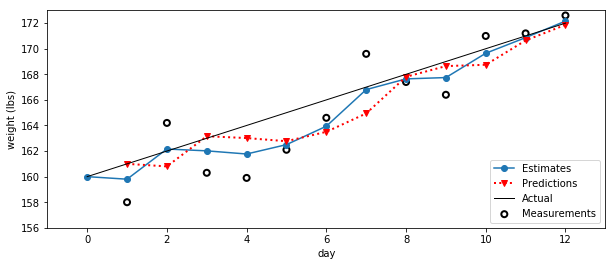

In [22]:
# plot results
book_plots.set_figsize(10)
gh.plot_gh_results(weights, estimates, predictions, [160, 172])
weights
# 注意估计如何始终落在测量和预测之间

That is pretty good! There is a lot of data here, so let's talk about how to interpret it.  The thick blue line shows the estimate from the filter. It starts at day 0 with the initial guess of 160 lbs. The red line shows the prediction that is made from the previous day's weight. So, on day one the previous weight was 160 lbs, the weight gain is 1 lb, and so the first prediction is 161 lbs. The estimate on day one is then part way between the prediction and measurement at 159.8 lbs. Below the chart is a print out of the previous weight, predicted weight, and new estimate for each day. Finally, the thin black line shows the actual weight gain of the person being weighed.  
很好！这里有很多数据，所以让我们谈谈如何解释它。粗蓝线显示了来自过滤器的估算值。它从第0天开始，初始猜测为160磅。红线显示了根据前一天的体重做出的预测。因此，在第一天，先前的体重为160磅，体重增加为1磅，因此第一个预测为161磅。然后，第一天的估计值介于159.8磅的预测值与测量值之间。图表下方是每天的先前体重，预测体重和新估算值的打印内容。最后，黑色细线显示了被称重人员的实际体重增加。


Walk through this for each day, ensuring you understand how the prediction and estimates were formed at each step. Note how the estimate always falls between the measurement and prediction.  
每天都进行遍历，确保您了解每个步骤的预测和估计是如何形成的。注意估计如何始终落在测量和预测之间。

The estimates are not a straight line, but they are straighter than the measurements and somewhat close to the trend line we created. Also, it seems to get better over time.  
估计值不是一条直线，但是比测量值更直，并且有些接近我们创建的趋势线。而且，随着时间的流逝，它似乎会变得更好。

The results of the filter may strike you as quite silly; of course the data will look good if we assume the conclusion, that our weight gain is around 1 lb/day! Let's see what the filter does if our initial guess is bad. Let's predict that there is a weight loss of 1 lb a day:  
过滤器的结果可能会让您觉得很愚蠢；当然，如果我们得出这样的结论，即体重增加约1磅/天，数据将看起来不错！让我们看看如果我们最初的猜测很不好，过滤器会做什么。让我们预测每天有1磅的体重减轻：

previous estimate: 160.00, prediction: 159.00, estimate 158.60
previous estimate: 158.60, prediction: 157.60, estimate 160.24
previous estimate: 160.24, prediction: 159.24, estimate 159.66
previous estimate: 159.66, prediction: 158.66, estimate 159.16
previous estimate: 159.16, prediction: 158.16, estimate 159.74
previous estimate: 159.74, prediction: 158.74, estimate 161.08
previous estimate: 161.08, prediction: 160.08, estimate 163.89
previous estimate: 163.89, prediction: 162.89, estimate 164.69
previous estimate: 164.69, prediction: 163.69, estimate 164.78
previous estimate: 164.78, prediction: 163.78, estimate 166.67
previous estimate: 166.67, prediction: 165.67, estimate 167.88
previous estimate: 167.88, prediction: 166.88, estimate 169.17


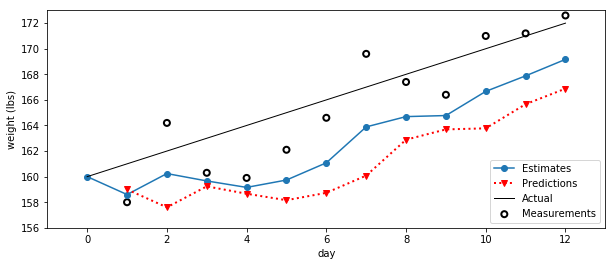

In [20]:
e, p = predict_using_gain_guess(initial_estimate, -1., do_print=True)
gh.plot_gh_results(weights, e, p, [160, 172])

That is not so impressive. The estimates quickly divert from the measurements. Clearly a filter that requires us to correctly guess a rate of change is not very useful. Even if our initial guess was correct, the filter will fail as soon as that rate of change changes. If I stop overeating the filter will have extreme difficulty in adjusting to that change. Note that it is adjusting! The estimates are climbing even though we tell it we are losing 1 lb a day. It just can't adjust fast enough.  
那不是那么令人印象深刻。估算值迅速从测量值中转移出来。显然，要求我们正确猜测变化率的过滤器不是很有用。即使我们最初的猜测是正确的，只要该变化率发生变化，过滤器就会失效。如果我停止暴饮暴食，过滤器将很难适应这种变化。请注意，它正在调整！即使我们告诉我们每天损失1磅，估计数字仍在上升。它只是调整得不够快。

But, 'what if'? What if instead of leaving the weight gain at the initial guess of 1 lb (or whatever), we compute it from the existing measurements and estimates. On day one our estimate for the weight is:
但是，“如果”呢？如果不是将重量增加保留在最初的1磅（或任何其他数值）时，怎么办，而是从现有的测量和估算中计算出来。在第一天，我们对重量的估计是：

$$
(160 + 1) + \frac{4}{10}(158-161) = 159.8
$$

On the next day we measure 164.2, which implies a weight gain of 4.4 lbs (since 164.2 - 159.8 = 4.4), not 1. Can we use this information somehow? It seems plausible. After all, the weight measurement itself is based on a real world measurement of our weight, so there is useful information. Our estimate of our weight gain may not be perfect, but it is surely better than just guessing our gain is 1 lb. Data is better than a guess, even if it is noisy.  
第二天，我们测量164.2，这意味着增重4.4磅（因为164.2-159.8 = 4.4），而不是1。我们可以某种方式使用此信息吗？这似乎是合理的。毕竟，体重测量本身就是基于我们对体重的真实测量，因此有一些有用的信息。我们对体重增加的估计可能并不完美，但肯定比仅仅猜测体重增加1磅更好。即使噪音很大，数据也比猜测更好。

People really balk at this point, so make sure you are in agreement. Two noisy measurements of weight give us an implied weight gain/loss. That estimate is going to be very inaccurate if the measurements are inaccurate, but there is still information in this computation. Imagine weighing a cow with a scale accurate to 1 lb, and it shows that the cow gained 10 lbs. The cow might have gained 8 lbs up to 12 lbs, depending on the errors, but we know it gained weight, and roughly how much. This is information. What do we do with information? Never throw it away!  
人们在这一点上实在不愿意，因此请确保您同意。两次嘈杂的重量测量会给我们带来隐含的体重增加/减少。如果测量结果不准确，则该估计将非常不准确，但是此计算中仍然有信息。想象一下，用精确到1磅的磅秤称重一头母牛，这表明母牛体重增加了10磅。取决于误差，母牛可能增加了8磅，最高达到12磅，但我们知道它的体重以及大约多少增加了。这是信息。我们如何处理信息？永远不要扔掉它！

Back to my diet. Should we set the new gain/day to 4.4 lbs? Yesterday we thought the weight gain was 1 lb, today we think it is 4.4 lbs. We have two numbers, and want to combine them somehow. Hmm, sounds like our same problem again. Let's use our same tool, and the only tool we have so far - pick a value part way between the two. This time I will use another arbitrarily chosen number, $\frac{1}{3}$. The equation is identical as for the weight estimate except we have to incorporate time because this is a rate (gain/day):  
回到我的饮食。我们是否应该将新的天/日设置为4.4磅？昨天我们认为体重增加了1磅，今天我们认为是4.4磅。我们有两个数字，并希望以某种方式将它们组合。嗯，听起来又像我们的问题。让我们使用相同的工具，这是迄今为止我们拥有的唯一工具-在两者之间选择一个值。这次，我将使用另一个任意选择的数字1/3。该方程式与重量估算值相同，不同之处在于我们必须考虑时间，因为这是一个比率（收益/天）：

$$\text{new gain} = \text{old gain} + \frac{1}{3}\frac{\text{measurement - predicted weight}}{1 \text{ day}}
$$

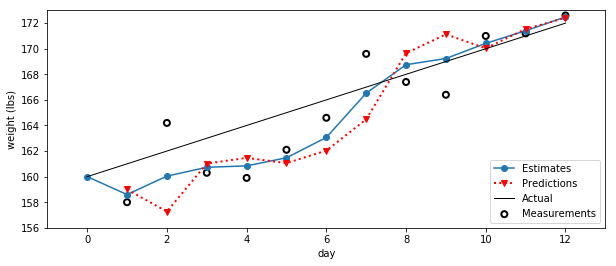

In [21]:
weight       = 160.       # initial guess
gain_rate    = -1.0       # initial guess

time_step    = 1.
weight_scale = 4./10
gain_scale   = 1./3
estimates    = [weight]
predictions  = []

for z in weights:
    # prediction step
    # 根据时间模型预测
    weight    = weight + gain_rate*time_step
    gain_rate = gain_rate                                        # 随时更新“增益比”
    predictions.append(weight)
    
    # update step    
    residual  = z - weight                                       
    
    # 新增益比 = 旧的增益比 + 认为设置权重 * （残差跨度 / 时间跨度）
    gain_rate = gain_rate + gain_scale   * (residual/time_step)  # 更新 新的增益比，增益比更新算法
    weight    = weight    + weight_scale * residual              # 更新 新的体重， 估计新的体重
  
    estimates.append(weight)

gh.plot_gh_results(weights, estimates, predictions, [160, 172])

I think this is starting to look really good. Because of the poor initial guess of the weight gain being -1 it takes the filter several days to accurately predict the weight, but once it does that it starts to accurately track the weight. We used no methodology for choosing our scaling factors of $\frac{4}{10}$ and $\frac{1}{3}$ (actually, they are poor choices for this problem), but otherwise all of the math followed from very reasonable assumptions. Recall that you can change the value of the parameter `time_step` to a larger value and re-run the cell if you want to see the plot drawn step-by-step.  
我认为这看起来真的很好。由于最初对增重的猜测很差，即-1，因此过滤器需要几天才能准确预测体重，但一旦这样做，它就会开始准确跟踪体重。我们没有使用任何方法来选择4/10和1/3的比例因子（实际上，它们对于此问题而言是较差的选择），但是除此之外，所有的数学运算都是基于非常合理的假设进行的。回想一下，您可以将参数time_step的值更改为较大的值，如果要逐步查看绘制的图，则可以重新运行单元格。


One final point before we go on. In the prediction step I wrote the line
最后一点，然后我们继续。在预测步骤中，我写了一行
```python
gain_rate = gain_rate
``` 
This obviously has no effect, and can be removed. I wrote this to emphasize that in the prediction step you need to predict the next value for all variables, both `weight` and `gain_rate`. This will become relevant shortly. In this case we are assuming that the gain does not vary, but when we generalize this algorithm we will remove that assumption.   
这显然没有效果，可以删除。我写这篇文章的目的是为了强调在预测步骤中，您需要预测所有变量（权重和增益率）的下一个值。这将很快成为现实。在这种情况下，我们假设增益没有变化，但是当我们对该算法进行概括时，我们将删除该假设。

## The g-h Filter

This algorithm is known as the [g-h filter](https://en.wikipedia.org/wiki/Alpha_beta_filter) or the $\alpha$-$\beta$ filter. $g$ and $h$ refer to the two scaling factors that we used in our example. $g$ is the scaling we used for the measurement (weight in our example), and $h$ is the scaling for the change in measurement over time (lbs/day in our example). $\alpha$ and $\beta$ are just different names used for this factors.    
该算法称为g-h滤波器或𝛼-𝛽滤波器。 𝑔和ℎ指的是我们在示例中使用的两个缩放因子。 𝑔是用于测量的标度（在本例中为重量），h是测量值随时间变化的标度（在本例中为磅/天）。 𝛼和𝛽只是用于此因素的不同名称。

This filter is the basis for a huge number of filters, including the Kalman filter. In other words, the Kalman filter is a form of the g-h filter, which I will prove later in the book. So is the Least Squares filter, which you may have heard of, and so is the Benedict-Bordner filter, which you probably have not. Each filter has a different way of assigning values to $g$ and $h$, but otherwise the algorithms are identical. For example, the Benedict-Bordner filter assigns a constant to $g$ and $h$, constrained to a certain range of values. Other filters such as the Kalman will vary $g$ and $h$ dynamically at each time step.  
该滤波器是包括Kalman滤波器在内的众多滤波器的基础。换句话说，卡尔曼滤波器是g-h滤波器的一种形式，我将在本书后面对此进行证明。您可能听说过的最小二乘滤波器也是如此，您可能还没有听说过的本尼迪克特-博德纳滤波器也是如此。每个过滤器都有不同的方式为$ g $和$ h $分配值，但是其他算法是相同的。例如，Benedict-Bordner过滤器将常量$ g $和$ h $分配给一定范围的值。其他过滤器（例如Kalman）将在每个时间步长动态变化$ g $和$ h $。

**Let me repeat the key points as they are so important**. If you do not understand these you will not understand the rest of the book. If you do understand them, then the rest of the book will unfold naturally for you as mathematical elaborations to various 'what if' questions we will ask about $g$ and $h$. The math may look profoundly different, but the algorithm will be exactly the same.  
**让我重复关键点，因为它们是如此重要**。如果您不理解这些内容，那么您将不会理解本书的其余部分。如果您确实理解它们，那么本书的其余部分将自然地展开，作为对各种“假设”问题的数学阐述，我们将询问$ g $和$ h $。数学可能看起来截然不同，但算法将完全相同。

* Multiple data points are more accurate than one data point, so throw nothing away no matter how inaccurate it is.
* Always choose a number part way between two data points to create a more accurate estimate.
* Predict the next measurement and rate of change based on the current estimate and how much we think it will change.
* The new estimate is then chosen as part way between the prediction and next measurement scaled by how accurate each is.  
* 多个数据点比一个数据点更准确，因此无论它有多不准确，都不要丢掉任何东西。 
* 始终在两个数据点之间选择一个数字，以创建更准确的估算值。 
* 根据当前的估计 以及“我们认为会发生多少变化”，预测下一次“测量和变化率”。
  - gain_rate = gain_rate + gain_scale   * (residual/time_step)  # 更新 新的增益比，增益比更新算法
  - weight    = weight    + weight_scale * residual              # 更新 新的体重， 估计新的体重
* 然后，选择新的估计值作为预测和下一个测量之间的一部分，并根据每个测量的精确度进行缩放。

Let's look at a visual depiction of the algorithm.  
让我们看一下算法的直观描述。

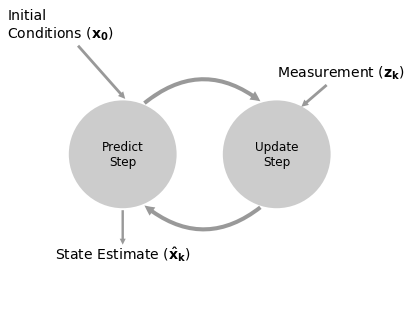

In [22]:
book_plots.predict_update_chart()

Let me introduce some more formal terminology. The *system* is the object that we want to estimate. In this chapter the system is whatever we are trying to weigh. Some texts call this the *plant*. That terminology comes from control system theory. https://en.wikipedia.org/wiki/Plant_(control_theory)  
让我介绍一些更正式的术语。该系统是我们要估算的对象。在本章中，我们将尝试权衡该系统。有些文字称其为植物。该术语来自控制系统理论。 https://zh.wikipedia.org/wiki/Plant_(control_theory）

The *state* of the system is the current configuration or values of that system that is of interest to us. We are interested only in the weight reading. If I put a 100 kg weight on the scale, the state is 100kg. We define the state based on what is relevant to us. The color of the scale is irrelevant to us so we do not include those values in the state. A QA engineer for the manufacturer might include color in the state so that she can track and control the manufacturing process.   
系统的“<span class="burk">状态</span>”是我们感兴趣的系统的当前配置或值。我们只对重量读数感兴趣。如果我在秤上放100公斤的重物，则状态为100公斤。我们根据与我们相关的事物来定义状态。标尺的颜色与我们无关，因此我们不在状态中包括这些值。制造商的质量检查工程师可能会在状态中添加颜色，以便她可以跟踪和控制制造过程。

The *measurement* is a measured value of the system. Measurements can be inaccurate, so it may not have the same value as the state.  
*<span class="burk">measurement</span>* 是系统的测量值。测量值可能不准确，因此它可能与状态值不同。

The *<span class="burk">state estimate</span>* is our filter's estimate of the state. For example, for the 100 kg weight our estimate might be 99.327 kg due to sensor errors. This is commonly abbreviated to *estimate*, and I have done that in this chapter.  
*状态估计* 是我们的过滤器对状态的估计。例如，对于100千克的重量，由于传感器错误，我们的估计值可能为99.327千克。这通常缩写为* estimate *，我已经在本章中做到了。

In other words, the state should be understood as the actual value of the system. This value is usually *hidden* to us.  If I stepped on a scale you'd then have a *measurement*. We call this *observable* since you can directly observe this measurement. In contrast, you can never directly observe my weight, you can only measure it.   
换句话说，<span class="burk">状态应理解为系统的实际值</span>。此值通常对我们“<span class="burk">隐藏</span>”。如果我踩到磅秤，那么您将获得*<span class="burk">测量</span>*。我们称其为“<span class="burk">可观察的</span>”，因为您可以直接观察此测量。相反，您永远无法直接观察我的体重，只能测量体重。

This language of *hidden* and *observable* is important. Any estimation problem consists of forming an estimate of a hidden state via observable measurements. If you read the literature these terms are used when defining a problem, so you need to be comfortable with them.  
“隐藏”和“可观察”的这种语言很重要。任何估计问题都包括通过可观察到的测量来形成隐藏状态的估计。如果您阅读文献，则在定义问题时会使用这些术语，因此您需要对此感到满意。

We use a *process model* to mathematically model the system. In this chapter our process model is the assumption that my weight today is yesterday's weight plus my weight gain for the last day. The process model does not model or otherwise account for the sensors. Another example would be a process model for an automobile. The process model might be "distance equals velocity times time. This model is not perfect as the velocity of a car can vary over a non-zero amount of time, the tires can slip on the road, and so on. The *system error* or *process error* is the error in this model. We never know this value exactly; if we did we could refine our model to have zero error. Some texts use *plant model* and *plant error*. You may also see *system model*. They all mean the same thing.  
我们使用“过程模型”对系统进行数学建模。在本章中，我们的过程模型假设今天的体重是昨天的体重加上最后一天的体重增加。过程模型不对传感器建模或以其他方式解释。另一个例子是汽车的过程模型。过程模型可能是“距离等于速度乘以时间。此模型并不完美，因为汽车的速度可能会在非零时间范围内变化，轮胎可能会在道路上打滑，等等。*系统误差*或*过程错误*是该模型中的错误。我们永远无法确切知道此值；如果这样做，我们可以将模型精炼为零错误。有些文本使用*工厂模型*和*工厂错误*。您可能还会看到*系统模型*。它们都是同一件事。

The predict step is known as *system propagation*. It uses the *process model* to form a new *state estimate*. Because of the *process error* this estimate is imperfect. Assuming we are tracking data over time, we say we *propagate* the state into the future. Some texts call this the *evolution*.    
预测步骤称为*系统传播*。它使用过程模型来形成新的状态估计。由于*过程错误*，此估算不完美。假设我们随着时间的推移跟踪数据，则说我们“传播”了未来的状态。一些文本将其称为“进化”。

The update step is known as the *measurement update*. One iteration of the system propagation and measurement update is known as an *epoch*.   
更新步骤称为*测量更新*。系统传播和测量更新的一次迭代称为*epoch*。

Now let's explore a few different problem domains to better understand this algorithm. Consider the problem of trying to track a train on a track. The track constrains the position of the train to a very specific region. Furthermore, trains are large and slow. It takes many minutes for them to slow down or speed up significantly. So, if I know that the train is at kilometer marker 23 km at time t and moving at 18 kph, I can be extremely confident in predicting its position at time t + 1 second. Why is that important? Suppose we can only measure its position with an accuracy of $\pm$ 250 meters. The train is moving at 18 kph, which is 5 meters per second. At t+1 seconds the train will be at 23.005 km yet the measurement could be anywhere from 22.755 km to 23.255 km. So if the next measurement says the position is at 23.4 we know that must be inaccurate. Even if at time t the engineer slammed on the brakes the train will still be very near to 23.005 km because a train cannot slow down very much in 1 second. If we were to design a filter for this problem (and we will a bit further in the chapter!) we would want to design a filter that gave a very high weighting to the prediction vs the measurement.    
现在，让我们探索一些不同的问题领域，以更好地理解该算法。考虑尝试在轨道上跟踪火车的问题。轨道将火车的位置限制在非常特定的区域。此外，火车又大又慢。他们需要花费很多时间来减慢或加快速度。因此，如果我知道火车在时间t处位于23公里处的公里标记处，并以18 kph的速度行驶，那么我将非常有信心在时间t +1秒处预测其位置。为什么这么重要？假设我们只能以±±250米的精度测量其位置。火车以18公里/小时的速度行驶，即每秒5米。在t + 1秒处，火车将在23.005 km处，但测量范围可能在22.755 km至23.255 km之间。因此，如果下一次测量显示位置在23.4，我们知道那一定是不准确的。即使工程师在时刻t踩刹车，火车仍将非常接近23.005 km，因为火车无法在1秒内减速很多。如果我们要设计一个针对该问题的滤波器（我们将在本章中做进一步说明！），我们将要设计一个滤波器，该滤波器对预测与测量的权重很高。

Now consider the problem of tracking a thrown ball. We know that a ballistic object moves in a parabola in a vacuum when in a gravitational field. But a ball thrown on Earth is influenced by air drag, so it does not travel in a perfect parabola. Baseball pitchers take advantage of this fact when they throw curve balls. Let's say that we are tracking the ball inside a stadium using computer vision, something I do at work. The accuracy of the computer vision tracking might be modest, but predicting the ball's future positions by assuming that it is moving on a parabola is not extremely accurate either. In this case we'd probably design a filter that gave roughly equal weight to the measurement and the prediction.  
现在考虑跟踪投掷球的问题。我们知道，在重力场中，弹道物体在真空中以抛物线运动。但是，抛在地球上的球会受到空气阻力的影响，因此它不会以完美的抛物线传播。棒球投手在投掷曲线球时会利用这一事实。假设我们正在使用计算机视觉在体育场内跟踪球，这是我在工作中所做的事情。计算机视觉跟踪的准确性可能不高，但是通过假设球在抛物线上移动来预测球的未来位置也不是非常准确。在这种情况下，我们可能会设计一个过滤器，使测量和预测的权重大致相等。

Now consider trying to track a helium party balloon in a hurricane. We have no legitimate model that would allow us to predict the balloon's behavior except over very brief time scales (we know the balloon cannot go 10 miles in 1 second, for example). In this case we would design a filter that emphasized the measurements over the predictions.  
现在考虑尝试在飓风中追踪氦气派对气球。除了在非常短的时间范围内（例如，我们知道气球在1秒内不能走10英里）外，我们没有合法的模型可以预测气球的行为。在这种情况下，我们将设计一个过滤器，该过滤器会重点强调预测结果。

Most of this book is devoted to expressing the concerns in the last three paragraphs mathematically, which then allows us to find an optimal solution (in some mathematical sense). In this chapter we will merely be assigning different values to $g$ and $h$ in a more intuitive, and thus less optimal way. But the fundamental idea is to blend somewhat inaccurate measurements with somewhat inaccurate models of how the systems behaves to get a filtered estimate that is better than either information source by itself.  
本书的大部分内容都专门用来数学地表达最后三段中的关注点，从而使我们能够找到最佳的解决方案（在某种数学意义上）。在本章中，我们将仅以一种更直观，因而不太理想的方式为$ g $和$ h $分配不同的值。但是，基本思想是将一些不准确的测量结果与一些不准确的模型相结合，以了解系统的行为方式，从而获得比任何一个信息源本身都更好的滤波估计。

We can express this as an algorithm:
我们可以将其表示为一种算法：

**Initialization 初始化**

    1. Initialize the state of the filter
    1. 初始化过滤器的状态
      - weight       = 160.       # initial guess
    2. Initialize our belief in the state
    2. 初始化我们对状态的置信度
      - gain_rate    = -1.0       # initial guess

**Predict 预测**

    1. Use system behavior to predict state at the next time step
    1. 使用系统行为来预测下一步的状态
       - 比如时间规律模型预测状态
    2. Adjust belief to account for the uncertainty in prediction
    2. 根据不同模型"调整置信度(增益比)"以解决预测中的不确定性
       - # 新增益比 = 旧的增益比 + 认为设置权重 * （残差跨度 / 时间跨度）
       - gain_rate = gain_rate + gain_scale   * (residual/time_step)  # 更新 新的增益比，增益比更新算法
       - weight    = weight    + weight_scale * residual              # 更新 新的体重， 估计新的体重
    
**Update**

    1. Get a measurement and associated belief about its accuracy
    1. 获得有关其准确性的度量（概率分布）和相关置信度（增益比）
    2. Compute residual between estimated state and measurement
    2. 计算估计状态和度量之间的残差
    3. New estimate is somewhere on the residual line
    3. 新的估算值在剩余线上
    
We will use this same algorithm throughout the book, albeit with some modifications.   
尽管有一些修改，我们将在整本书中使用相同的算法。

## Notation

I'll begin to introduce the notations and variable names used in the literature. Some of this was already used in the above charts. Measurement is typically denoted $z$ and that is what we will use in this book (some literature uses $y$). Subscript $k$ indicates the time step, so $z_k$ is the data for this time step. A bold font denotes a vector or matrix. So far we have only considered having one sensor, and hence one sensor measurement, but in general we may have *n* sensors and *n* measurements. $\mathbf{x}$ denotes our state, and is bold to denote that it is a vector. For our scale example, it represents both the initial weight and initial weight gain rate, like so:

$$\mathbf{x} = \begin{bmatrix}x \\ \dot{x}\end{bmatrix}$$

Here I use Newton's notation of a dot over the x to denote velocity. More precisely, the dot implies the derivative of x with respect to time, which of course is the velocity. For a weight of 62 kg with a gain of 0.3 kg/day we have

$$\mathbf{x} = \begin{bmatrix}62 \\ 0.3\end{bmatrix}$$

So, the algorithm is simple. The state is initialized with $\mathbf{x_0}$, the initial estimate. We then enter a loop, predicting the state for time or step $k$ from the values from time (or step) $k-1$. We then get the measurement $z_k$ and choose some intermediate point between the measurements and prediction, creating the estimate $\mathbf{x}_k$.

## Exercise: Write Generic Algorithm

In the example above, I explicitly coded this to solve the weighing problem that we've been discussing throughout the chapter. For example, the variables are named "weight_scale", "gain", and so on. I did this to make the algorithm easy to follow - you can easily see that we correctly implemented each step. But, that is code written for exactly one problem, and the algorithm is the same for any problem. So let's rewrite the code to be generic - to work with any problem. Use this function signature:

```python
def g_h_filter(data, x0, dx, g, h, dt):
    """
    Performs g-h filter on 1 state variable with a fixed g and h.

    'data' contains the data to be filtered.
    'x0' is the initial value for our state variable
    'dx' is the initial change rate for our state variable
    'g' is the g-h's g scale factor
    'h' is the g-h's h scale factor
    'dt' is the length of the time step 
    """
```

Return the data as a NumPy array, not a list. Test it by passing in the same weight data as before, plot the results, and visually determine that it works.

In [23]:
from kf_book.gh_internal import plot_g_h_results
def g_h_filter(data, x0, dx, g, h, dt):
    pass #  your solution here

# uncomment to run the filter and plot the results
#book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
#data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
#plot_g_h_results(weights, data)

### Solution and Discussion

[158.0, 164.2, 160.3, 159.9, 162.1, 164.6, 169.6, 167.4, 166.4, 171.0, 171.2, 172.6]
[159.2        161.8        162.1        160.78       160.98533333
 163.31057778 168.10029037 169.69598183 168.20360386 169.1642501
 170.89234186 172.62868399]


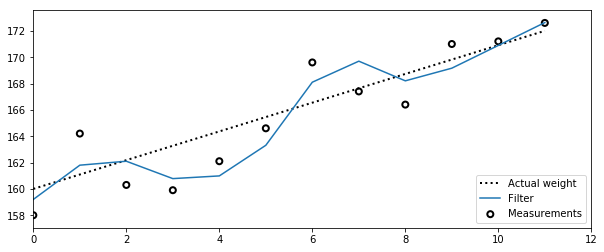

In [24]:
import matplotlib.pylab as pylab

def g_h_filter(data, x0, dx, g, h, dt=1.):
    x_est = x0
    results = []
    for z in data:
        # prediction step
        x_pred = x_est + (dx*dt)
        dx = dx

        # update step
        residual = z - x_pred
        dx = dx + h * (residual) / dt
        x_est = x_pred + g * residual
        results.append(x_est)
    return np.array(results)

book_plots.plot_track([0, 11], [160, 172], label='Actual weight')
data = g_h_filter(data=weights, x0=160., dx=1., g=6./10, h=2./3, dt=1.)
plot_g_h_results(weights, data)
print(weights)
print(data)

This should have been straightforward. I just subtituted the variable names `x0`, `dx`, etc., for the variable names in the weight gain code. Nothing else needed to change.

## Choice of $g$ and $h$

The g-h filter is not one filter - it is a classification for a family of filters. Eli Brookner in *Tracking and Kalman Filtering Made Easy* lists 11, and I am sure there are more. Not only that, but each type of filter has numerous subtypes. Each filter is differentiated by how $g$ and $h$ are chosen. So there is no 'one size fits all' advice that I can give here. Some filters set $g$ and $h$ as constants, others vary them dynamically. The Kalman filter varies them dynamically at each step. Some filters allow $g$ and $h$ to take any value within a range, others constrain one to be dependent on the other by some function $f(\dot{}), \mbox{where }g = f(h)$.

The topic of this book is not the entire family of g-h filters; more importantly, we are interested in the *Bayesian* aspect of these filters, which I have not addressed yet. Therefore I will not cover selection of $g$ and $h$ in depth. *Tracking and Kalman Filtering Made Easy* is an excellent resource for that topic. If this strikes you as an odd position for me to take, recognize that the typical formulation of the Kalman filter does not use $g$ and $h$ at all. The Kalman filter is a g-h filter because it mathematically reduces to this algorithm. When we design the Kalman filter we use design criteria that can be mathematically reduced to $g$ and $h$, but the Kalman filter form is usually a much more powerful way to think about the problem. Don't worry if this is not too clear right now, it will clear once we develop the Kalman filter theory.

It is worth seeing how varying $g$ and $h$ affects the results, so we will work through some examples. This will give us strong insight into the fundamental strengths and limitations of this type of filter, and help us understand the behavior of the rather more sophisticated Kalman filter.

## Exercise: create measurement function

Now let's write a function that generates noisy data for us. In this book I model a noisy signal as the signal plus [white noise](https://en.wikipedia.org/wiki/White_noise). We've not yet covered the statistics to fully understand the definition of white noise. In essence, think of it as data that randomly varies higher and lower than the signal with no pattern. We say that it is a serially uncorrelated random variable with zero mean and finite variance. If you don't follow that, you will by the end of the *Gaussians* chapter. You may not be successful at this exercise if you have no knowledge of statistics. If so, just read the solution and discussion.

White noise can be generated by `numpy.random.randn()`. We want a function that we call with the starting value, the amount of change per step, the number of steps, and the amount of noise we want to add. It should return a list of the data. Test it by creating 30 points, filtering it with `g_h_filter()`, and plot the results with `plot_g_h_results()`.

In [25]:
# your code here

### Solution

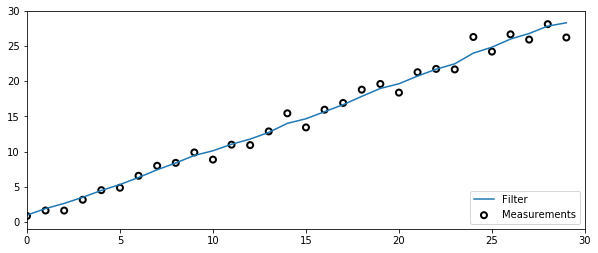

In [26]:
from numpy.random import randn
def gen_data(x0, dx, count, noise_factor):
    return [x0 + dx*i + randn()*noise_factor for i in range(count)]

measurements = gen_data(0, 1, 30, 1)
data = g_h_filter(data=measurements, x0=0., dx=1., dt=1., g=.2, h=0.02)
plot_g_h_results(measurements, data)

### Discussion

`randn()` returns random numbers centered around 0 - it is just as likely to be greater than zero as under zero. It varies by *one standard deviation* - don't worry if you don't know what that means. I've plotted 3000 calls to `randn()` - you can see that the values are centered around zero and mostly range from a bit under -1 to a bit more than +1, though occasionally they are much larger.

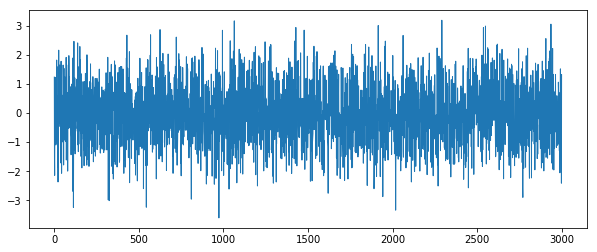

In [26]:
plt.plot([randn() for _ in range(3000)], lw=1);

## Exercise: Bad Initial Conditions

Now write code that uses `gen_data` and `g_h_filter` to filter 100 data points that starts at 5, has a derivative of 2, a noise scaling factor of 10, and uses g=0.2 and h=0.02. Set your initial guess for x to be 100.

In [27]:
# your code here

### Solution and Discussion

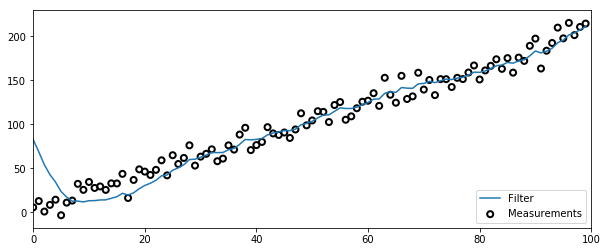

In [28]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=10)
data = g_h_filter(data=zs, x0=100., dx=2., dt=1., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

The filter starts out with estimates that are far from the measured data due to the bad initial guess of 100. You can see that it 'rings' before settling in on the measured data. 'Ringing' means that the signal overshoots and undershoots the data in a sinusoidal type pattern. This is a very common phenomena in filters, and a lot of work in filter design is devoted to minimizing ringing. That is a topic that we are not yet prepared to address, but I wanted to show you the phenomenon.

## Exercise: Extreme Noise

Rerun the same test, but this time use a noise factor of 100. Remove the initial condition ringing by changing the initial condition from 100 down to 5.

In [29]:
# your code here

### Solution and Discussion

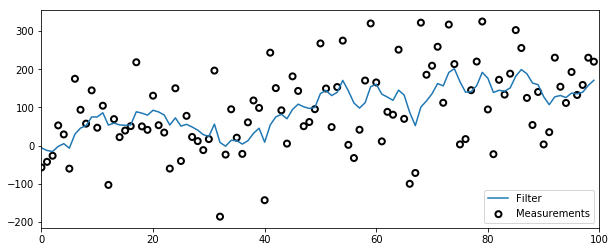

In [30]:
zs = gen_data(x0=5., dx=2., count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=2., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

This doesn't look so wonderful to me. We can see that perhaps the filtered signal varies less than the noisy signal, but it is far from the straight line. If we were to plot just the filtered result no one would guess that the signal starts at 5 and increments by 2 at each time step. And while in locations the filter does seem to reduce the noise, in other places it seems to overshoot and undershoot.

At this point we don't know enough to really judge this. We added **a lot** of noise; maybe this is as good as filtering can get. However, the existence of the multitude of chapters beyond this one should suggest that we can do much better.

## Exercise: The Effect of Acceleration

Write a new data generation function that adds in a constant acceleration factor to each data point. In other words, increment dx as you compute each data point so that the velocity (dx) is ever increasing. Set the noise to 0, $g=0.2$ and $h=0.02$ and plot the results using `plot_g_h_results` or your own routine. Play around with different accererations and times steps. Explain what you see.

In [31]:
# your code here

### Solution and Discussion

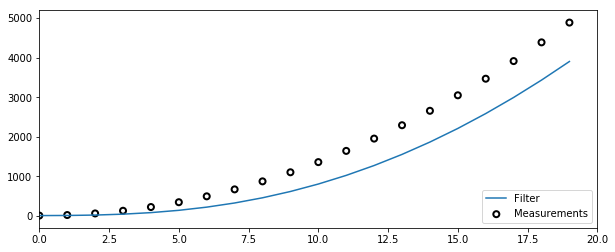

In [32]:
def gen_data(x0, dx, count, noise_factor, accel=0.):
    zs = []
    for i in range(count):
        zs.append(x0 + accel * (i**2) / 2 + dx*i + randn()*noise_factor)
        dx += accel
    return zs
   
predictions = []
zs = gen_data(x0=10., dx=0., count=20, noise_factor=0, accel=9.)
data = g_h_filter(data=zs, x0=10., dx=0., g=0.2, h=0.02)
plot_g_h_results(measurements=zs, filtered_data=data)

Each prediction lags behind the signal. If you think about what is happening this makes sense. Our model assumes that velocity is constant. The g-h filter computes the first derivative of $x$ (we use $\dot{x}$ to denote the derivative) but not the second derivative $\ddot{x}$. So we are assuming that $\ddot{x}=0$. At each prediction step we predict the new value of x as $x + \dot{x}*t$. But because of the acceleration the prediction must necessarily fall behind the actual value. We then try to compute a new value for $\dot{x}$, but because of the $h$ factor we only partially adjust $\dot{x}$ to the new velocity. On the next iteration we will again fall short.

Note that there is no adjustment to $g$ or $h$ that we can make to correct this problem. This is called the *lag error* or *systemic error* of the system. It is a fundamental property of g-h filters. Perhaps your mind is already suggesting solutions or workarounds to this problem. As you might expect, a lot of research has been devoted to this problem, and we will be presenting various solutions to this problem in this book.
> The 'take home' point is that the filter is only as good as the mathematical model used to express the system. 

## Exercise: Varying $g$

Now let's look at the effect of varying $g$. Before you perform this exercise, recall that $g$ is the scale factor for choosing between the measurement and prediction. What do you think the effect of a large value of $g$ will be? A small value?

Now, let the `noise_factor=50` and `dx=5`. Plot the results of $g = 0.1\mbox{, } 0.4,\mbox{ and } 0.8$.

In [33]:
# your code here

### Solution and Discussion

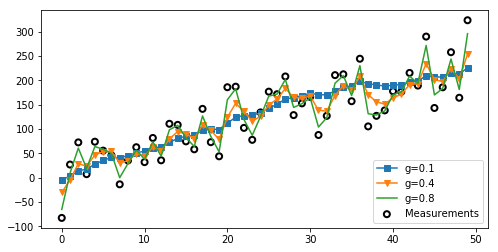

In [34]:
np.random.seed(100)
zs = gen_data(x0=5., dx=5., count=50, noise_factor=50)
data1 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.4, h=0.01)
data3 = g_h_filter(data=zs, x0=0., dx=5., dt=1., g=0.8, h=0.01)

with book_plots.figsize(y=4):
    book_plots.plot_measurements(zs, color='k')
    book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
    book_plots.plot_filter(data2, label='g=0.4', marker='v', c='C1')
    book_plots.plot_filter(data3, label='g=0.8', c='C2')
    plt.legend(loc=4)

It is clear that as $g$ is larger we more closely follow the measurement instead of the prediction. When $g=0.8$ we follow the signal almost exactly, and reject almost none of the noise. One might naively conclude that $g$ should always be very small to maximize noise rejection. However, that means that we are mostly ignoring the measurements in favor of our prediction. What happens when the signal changes not due to noise, but an actual state change? Let's have a look. I will create data that has $\dot{x}=1$ for 9 steps before changing to $\dot{x}=0$. 

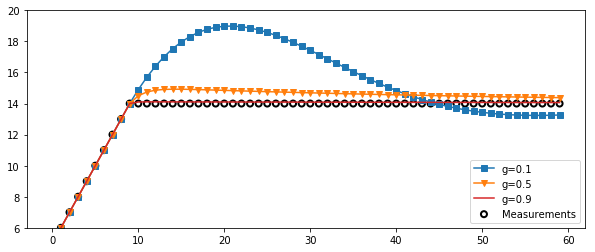

In [35]:
zs = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in range(50):
    zs.append(14)

data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.1, h=0.01)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.5, h=0.01)
data3 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=0.9, h=0.01)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='g=0.1', marker='s', c='C0')
book_plots.plot_filter(data2, label='g=0.5', marker='v', c='C1')
book_plots.plot_filter(data3, label='g=0.9', c='C3')
plt.legend(loc=4)
plt.ylim([6, 20]);

Here we can see the effects of ignoring the signal. We not only filter out noise, but legitimate changes in the signal as well. 

Maybe we need a 'Goldilocks' filter, where $g$ is not too large, not too small, but just right? Well, not exactly. As alluded to earlier, different filters choose $g$ and $h$ in different ways depending on the mathematical properties of the problem. For example, the Benedict-Bordner filter was invented to minimize the transient error in this example, where $\dot{x}$ makes a step jump. We will not discuss this filter in this book, but here are two plots chosen with different allowable pairs of $g$ and $h$. This filter design minimizes transient errors for step jumps in $\dot{x}$ at the cost of not being optimal for other types of changes in $\dot{x}$.

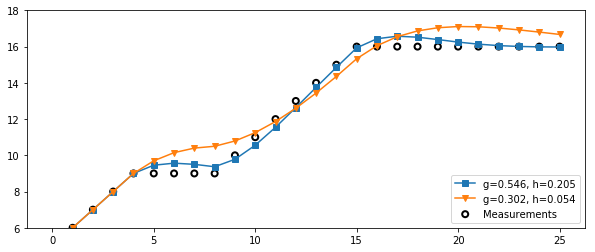

In [36]:
zs = [5,6,7,8,9,9,9,9,9,10,11,12,13,14,
      15,16,16,16,16,16,16,16,16,16,16,16]
data1 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.302, h=.054)
data2 = g_h_filter(data=zs, x0=4., dx=1., dt=1., g=.546, h=.205)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data2, label='g=0.546, h=0.205', marker='s', c='C0')
book_plots.plot_filter(data1, label='g=0.302, h=0.054', marker='v', c='C1')
plt.legend(loc=4)
plt.ylim([6, 18]);

## Varying $h$

Now let's leave $g$ unchanged and investigate the effect of modifying $h$. We know that $h$ affects how much we favor the measurement of $\dot{x}$ vs our prediction. But what does this *mean*? If our signal is changing a lot (quickly relative to the time step of our filter), then a large $h$ will cause us to react to those transient changes rapidly. A smaller $h$ will cause us to react more slowly.

We will look at three examples. We have a noiseless measurement that slowly goes from 0 to 1 in 50 steps. Our first filter uses a nearly correct initial value for $\dot{x}$ and a small $h$. You can see from the output that the filter output is very close to the signal. The second filter uses the very incorrect guess of $\dot{x}=2$. Here we see the filter 'ringing' until it settles down and finds the signal. The third filter uses the same conditions but it now sets $h=0.5$. If you look at the amplitude of the ringing you can see that it is much smaller than in the second chart, but the frequency is greater. It also settles down a bit quicker than the second filter, though not by much.

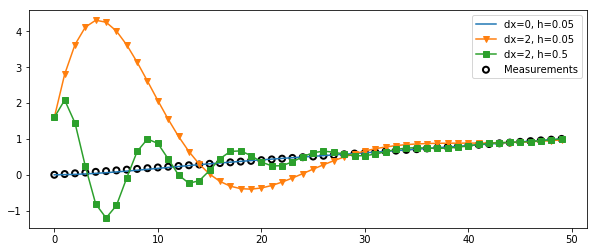

In [37]:
zs = np.linspace(0, 1, 50)

data1 = g_h_filter(data=zs, x0=0, dx=0., dt=1., g=.2, h=0.05)
data2 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.05)
data3 = g_h_filter(data=zs, x0=0, dx=2., dt=1., g=.2, h=0.5)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data1, label='dx=0, h=0.05', c='C0')
book_plots.plot_filter(data2, label='dx=2, h=0.05', marker='v', c='C1')
book_plots.plot_filter(data3, label='dx=2, h=0.5',  marker='s', c='C2')
plt.legend(loc=1);

## Interactive Example

For those of you running this in Jupyter Notebook I've written an interactive version of the filter so you can see the effect of changing $\dot{x}$, $g$ and $h$ in real time. As you adjust the sliders for $\dot{x}$, $g$ and $h$ the data will be refiltered and the results plotted for you.

If you really want to test yourself, read the next paragraph and try to predict the results before you move the sliders. 

Some things to try include setting $g$  and $h$ to their minimum values. See how perfectly the filter tracks the data! This is only because we are perfectly predicting the weight gain. Adjust $\dot{x}$ to larger or smaller than 5. The filter should diverge from the data and never reacquire it. Start adding back either $g$ or $h$ and see how the filter snaps back to the data. See what the difference in the line is when you add only $g$ vs only $h$. Can you explain the reason for the difference? Then try setting $g$ greater than 1. Can you explain the results? Put $g$ back to a reasonable value (such as 0.1), and then make $h$ very large. Can you explain these results? Finally, set both $g$ and $h$ to their largest values. 
 
If you want to explore with this more, change the value of the array `zs` to the values used in any of the charts above and rerun the cell to see the result.

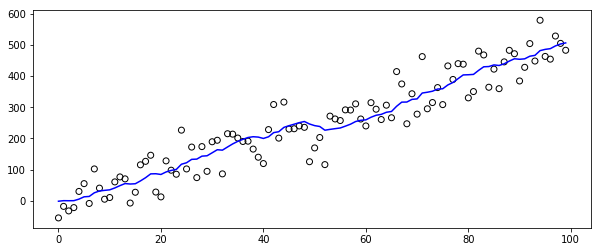

In [38]:
from ipywidgets import interact

# my FloatSlider returns an ipywidgets.FloatSlider with
# continuous_update=False. Filtering code runs too slowly
# to instantly react to slider changes.
from kf_book.book_plots import FloatSlider

zs1 = gen_data(x0=5, dx=5., count=100, noise_factor=50)

fig = None
def interactive_gh(x, dx, g, h):
    global fig
    if fig is not None: plt.close(fig)
    fig = plt.figure()
    data = g_h_filter(data=zs1, x0=x, dx=dx, g=g, h=h)
    plt.scatter(range(len(zs1)), zs1, edgecolor='k', 
                facecolors='none', marker='o', lw=1)
    plt.plot(data, color='b')

interact(interactive_gh,           
         x=FloatSlider(value=0, min=-200, max=200), 
         dx=FloatSlider(value=5, min=-50, max=50), 
         g=FloatSlider(value=.1, min=.01, max=2, step=.02), 
         h=FloatSlider(value=.02, min=.0, max=.5, step=.01));

## Don't Lie to the Filter

You are free to set $g$ and $h$ to any value. Here is a filter that performs perfectly despite extreme noise.

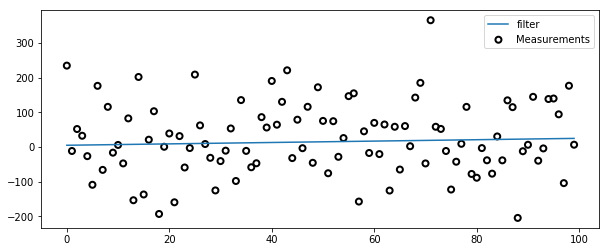

In [39]:
zs = gen_data(x0=5., dx=.2, count=100, noise_factor=100)
data = g_h_filter(data=zs, x0=5., dx=.2, dt=1., g=0., h=0.)

book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

I brilliantly extracted a straight line out of very noisy data! Maybe I shouldn't try to collect my Fields Medal in mathematics just yet. I did this by setting both $g$ and $h$ to 0. What does this do? It makes the filter ignore the measurements, and so for each update it computes the new position as $x + \Delta x \Delta t$. Of course the result is a straight line if we ignore the measurements. 

A filter that ignores measurements is useless. I know you would never set both $g$ and $h$ to zero as that takes a special kind of genius that only I possess, but I promise that if you are not careful you will set them lower than they should be. You can always make great looking results from test data. When you try your filter on different data you will be disappointed in the results because you finely tuned the constants for a specific data set. $g$ and $h$ must reflect the real world behavior of the system you are filtering, not the behavior of one specific data set. In later chapters we will learn a lot about how to do that. For now I can only say be careful, or you will be getting perfect results with your test data, but results like this once you switch to real data:

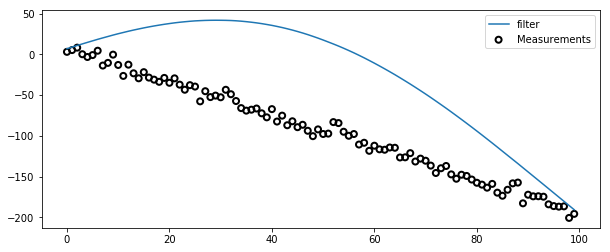

In [40]:
zs = gen_data(x0=5, dx=-2, count=100, noise_factor=5)
data = g_h_filter(data=zs, x0=5., dx=2., dt=1., g=.005, h=0.001)
book_plots.plot_measurements(zs)
book_plots.plot_filter(data, label='filter')
plt.legend(loc=1);

## Tracking a Train

We are ready for a practical example. Earlier in the chapter we talked about tracking a train. Trains are heavy and slow, thus they cannot change speed quickly. They are on a track, so they cannot change direction except by slowing to a stop and then reversing course. Hence, we can conclude that if we already know the train's approximate position and velocity then we can predict its position in the near future with a great deal of accuracy. A train cannot change its velocity much in a second or two. 

So let's write a filter for a train. Its position is expressed as its position on the track in relation to some fixed point which we say is 0 km. I.e., a position of 1 means that the train is 1 km away from the fixed point. Velocity is expressed as meters per second. We perform measurement of position once per second, and the error is $\pm$ 500 meters. How should we implement our filter?

First, let's simulate the situation without a filter. We will assume that the train is currently at kilometer 23, and moving at 15 m/s. We can code this as 

```python
pos = 23*1000
vel = 15
```

Now we can compute the position of the train at some future time, *assuming* no change in velocity, with

```python
def compute_new_position(pos, vel, dt=1):
    return pos + (vel * dt)
```

We can simulate the measurement by adding in some random noise to the position. Here our error is 500m, so the code might look like:

```python
def measure_position(pos):
        return pos + random.randn()*500
```
        
Let's put that in a cell and plot the results of 100 seconds of simulation. I will use NumPy's `asarray` function to convert the data into an NumPy array. This will allow me to divide all of the elements of the array at once by using the '/' operator.

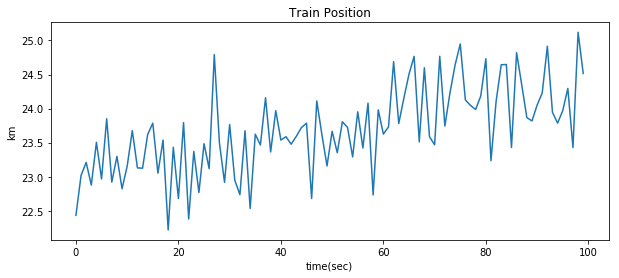

In [41]:
from numpy.random import randn

def compute_new_position(pos, vel, dt=1.):
    """ dt is the time delta in seconds."""
    return pos + (vel * dt)

def measure_position(pos):
    return pos + randn()*500

def gen_train_data(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        zs.append(measure_position(pos))
    return np.asarray(zs)
  
pos, vel = 23.*1000, 15.
zs = gen_train_data(pos, vel, 100)

plt.plot(zs / 1000.)  # convert to km
book_plots.set_labels('Train Position', 'time(sec)', 'km')

We can see from the chart how poor the measurements are. No real train could ever move like that. 

So what should we set $g$ and $h$ to if we want to filter this data? We have not developed the theory for this, but let's try to get a reasonable answer by the seat of our pants. We know that the measurements are very inaccurate, so we don't want to give them much weight at all. To do this we need to choose a very small $g$. We also know that trains can not accelerate or decelerate quickly, so we also want a very small $h$. For example:

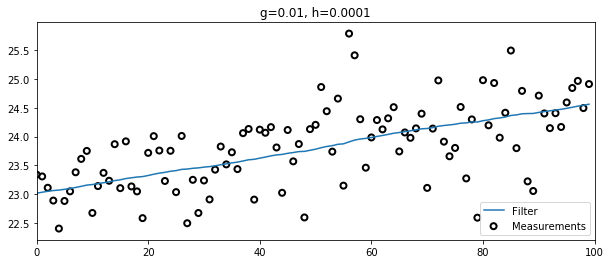

In [42]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

That is pretty good for an initial guess. Let's make $g$ larger to see the effect.

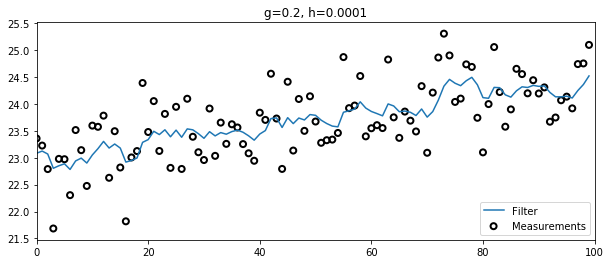

In [43]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.2, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.2, h=0.0001')

We made `g=0.2` and we can see that while the train's position is smoothed, the estimated position (and hence velocity) fluctuates a lot in a very tiny frame, far more than a real train can do. So empirically we know that we want `g<<0.2`.

Now let's see the effect of a poor choice for $h$.

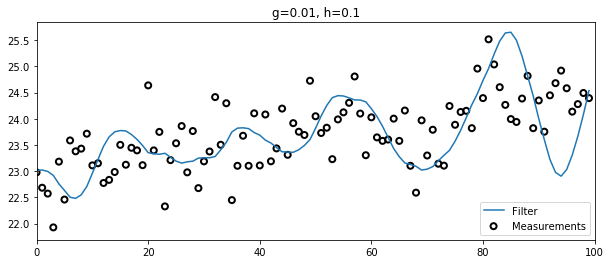

In [44]:
zs = gen_train_data(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=0.01, h=0.1)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.1')

Here the position changes smoothly thanks to the small $g$, but the large $h$ makes the filter very reactive to the measurements. This happens because in the course of a few seconds the rapidly changing measurement implies a very large velocity change, and a large $h$ tells the filter to react to those changes quickly. Trains cannot change velocity quickly, so the filter is not doing a good job of filtering the data - the filter is changing velocity faster than a train can.

Finally, let's add some acceleration to the train. I don't know how fast a train can actually accelerate, but let's say it is accelerating at 0.2 m/sec^2. 

In [45]:
def gen_train_data_with_acc(pos, vel, count):
    zs = []
    for t in range(count):
        pos = compute_new_position(pos, vel)
        vel += 0.2
        zs.append(measure_position(pos))
    return np.asarray(zs) 

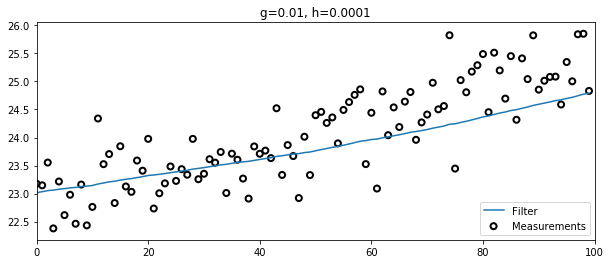

In [46]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.0001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.0001')

Here we see that the filter is not quite tracking the train anymore due to the acceleration. We can fiddle with $h$ to let it track better, at the expense of a less smooth filtered estimate.

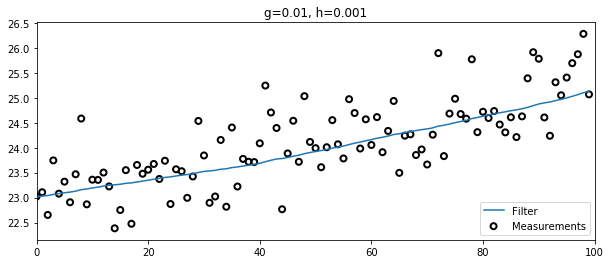

In [47]:
zs = gen_train_data_with_acc(pos=pos, vel=15., count=100)
data = g_h_filter(data=zs, x0=pos, dx=15., dt=1., g=.01, h=0.001)
plot_g_h_results(zs/1000., data/1000., 'g=0.01, h=0.001')

There are two lessons to be learned here. First, use the $h$ term to respond to changes in velocity that you are not modeling. But, far more importantly, there is a trade off here between responding quickly and accurately to changes in behavior and producing ideal output for when the system is in a steady state that you have. If the train never changes velocity we would make $h$ extremely small to avoid having the filtered estimate unduly affected by the noise in the measurement. But in an interesting problem there are almost always changes in state, and we want to react to them quickly. The more quickly we react to them, the more we are affected by the noise in the sensors. 

I could go on, but my aim is not to develop g-h filter theory here so much as to build insight into how combining measurements and predictions leads to a filtered solution. There is extensive literature on choosing $g$ and $h$ for problems such as this, and there are optimal ways of choosing them to achieve various goals. As I explained earlier it is easy to 'lie' to the filter when experimenting with test data like this. In the subsequent chapters we will learn how the Kalman filter solves this problem in the same basic manner, but with far more sophisticated mathematics. 

## g-h Filters with FilterPy

[FilterPy](https://github.com/rlabbe/filterpy) is an open source filtering library that I wrote. It has all of the filters in this book, along with others. It is rather easy to program your own g-h filter, but as we progress we will rely on FilterPy more. As a quick introduction, let's look at the g-h filter in FilterPy.

If you do not have FilterPy installed just issue the following command from the command line.

    pip install filterpy
    
Read Appendix A for more information on installing or downloading FilterPy from GitHub.

To use the g-h filter import it and create an object from the class `GHFilter`. 

In [48]:
from filterpy.gh import GHFilter
f = GHFilter(x=0., dx=0., dt=1., g=.8, h=.2)

ModuleNotFoundError: No module named 'filterpy'

When you construct the object you specify the initial value and rate of change for the signal (`x` and 'dx'), the time step between updates(`dt`) and the two filter parameter (`g` and `h`). `dx` must have the same units of `x`/`dt` - if `x` is in meters and `dt` is in seconds then `dx` must be in meters per second.

To run the filter call update, passing the measurement in the parameter `z`, which you'll recall is a standard name for measurements in the literature.

In [49]:
f.update(z=1.2)

NameError: name 'f' is not defined

`update()` returns the new value of `x` and `dx` in a tuple, but you can also access them from the object.

In [49]:
print(f.x, f.dx)

0.96 0.24


You can dynamically alter `g` and `h`.

In [50]:
print(f.update(z=2.1, g=.85, h=.15))

(1.965, 0.375)


You can filter a sequence of measurements in a batch.

In [51]:
print(f.batch_filter([3., 4., 5.]))

[[1.965 0.375]
 [2.868 0.507]
 [3.875 0.632]
 [4.901 0.731]]


You can filter multiple independent variables. If you are tracking an aircraft you'll need to track it in 3D space. Use NumPy arrays for `x`, `dx`, and the measurements.

In [52]:
x_0  = np.array([1., 10., 100.])
dx_0 = np.array([10., 12., .2])
               
f_air = GHFilter(x=x_0, dx=dx_0, dt=1., g=.8, h=.2)
f_air.update(z=np.array((2., 11., 102.)))
print(' x =', f_air.x)
print('dx =', f_air.dx)

 x = [  3.8   13.2  101.64]
dx = [8.2  9.8  0.56]


The class `GHFilterOrder` allows you to create a filter of order 0, 1, or 2. A g-h filter is order 1. The g-h-k filter, which we haven't talked about, also tracks accelerations. Both classes have functionality required by real applications, such as computing the Variance Reduction Factor (VRF), which we haven't discussed in this chapter. I could fill a book just on the theory and applications of g-h filters, but we have other goals in this book. If you are interested, explore the FilterPy code and do some further reading.

The documentation for FilterPy is at https://filterpy.readthedocs.org/.

## Summary

I encourage you to experiment with this filter to develop your understanding of how it reacts. It shouldn't take too many attempts to come to the realization that ad-hoc choices for $g$ and $h$ do not perform very well. A particular choice might perform well in one situation, but very poorly in another. Even when you understand the effect of $g$ and $h$ it can be difficult to choose proper values. In fact, it is extremely unlikely that you will choose values for $g$ and $h$ that is optimal for any given problem. Filters are *designed*, not selected *ad hoc*. 

In some ways I do not want to end the chapter here, as there is a significant amount that we can say about selecting $g$ and $h$. But the g-h filter in this form is not the purpose of this book. Designing the Kalman filter requires you to specify a number of parameters - indirectly they do relate to choosing $g$ and $h$, but you will never refer to them directly when designing Kalman filters. Furthermore, $g$ and $h$ will vary at every time step in a very non-obvious manner. 

There is another feature of these filters we have barely touched upon - Bayesian statistics. You will note that the term 'Bayesian' is in the title of this book; this is not a coincidence! For the time being we will leave $g$ and $h$ behind, largely unexplored, and develop a very powerful form of probabilistic reasoning about filtering. Yet suddenly this same g-h filter algorithm will appear, this time with a formal mathematical edifice that allows us to create filters from multiple sensors, to accurately estimate the amount of error in our solution, and to control robots.